1. Linear Least Squares Regression

In [12]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

442 10
(442,)


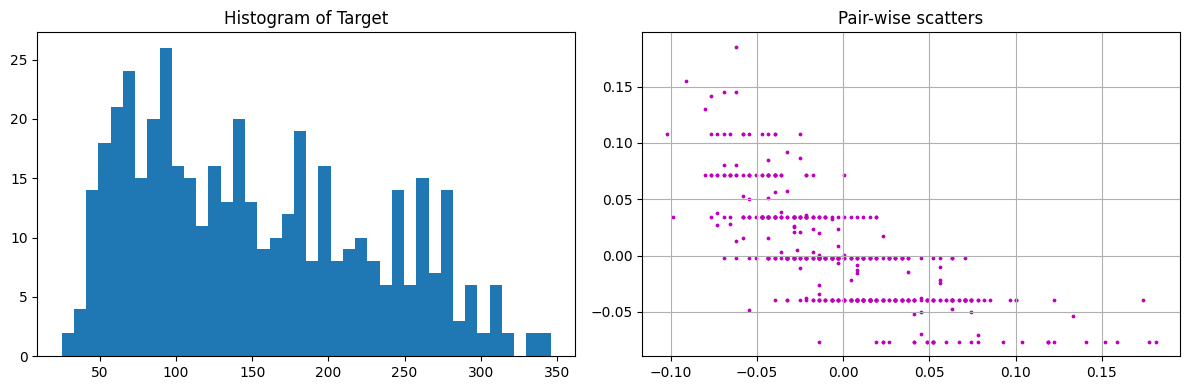

In [13]:
# Load data, inspect and do exploratory plots

diabetes = datasets.load_diabetes()

X = diabetes.data
t = diabetes.target

# Inspect sizes

NumData, NumFeatures = X.shape
print(NumData, NumFeatures)   # 442 x 10
print(t.shape)                # 442

# Plot and save

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].hist(t, bins=40)
ax[0].set_title("Histogram of Target")
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].set_title("Pair-wise scatters")
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

Comparing pseudo-inverse solution to sklearn output

Text(0.5, 1.0, 'Linear model from sklearn')

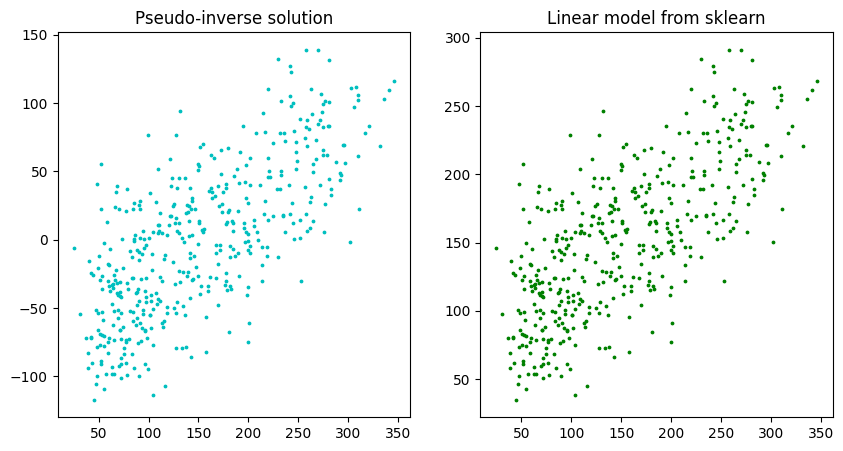

In [14]:
import numpy as np

# Linear regression using sklearn

lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)

# Pseudo-inverse solution to linear regression

w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w

# Plot predictions to check if they look the same!

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th2, c='c', s=3)
ax[0].set_title('Pseudo-inverse solution')
ax[1].scatter(t, th1, c='g', s=3)
ax[1].set_title('Linear model from sklearn')

2 Regularization

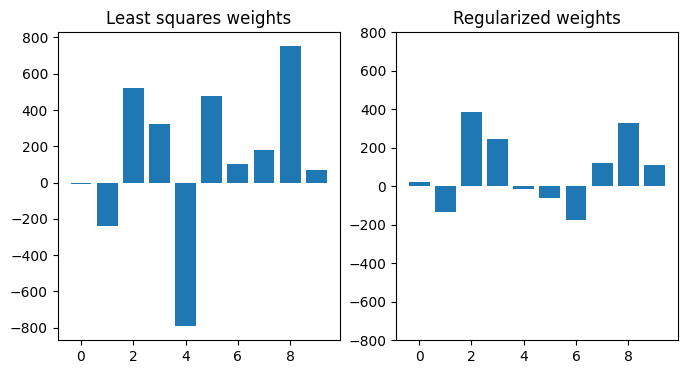

In [15]:
# Tikhanov (quadratic) Regularizer

gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)),w)
ax[0].set_title('Least squares weights')
ax[1].bar(np.arange(len(w)),wR)
ax[1].set_title('Regularized weights')
ax[1].set_ylim(-800, 800)


plt.savefig("LeastSquareAndRegularizedWeights.jpg")


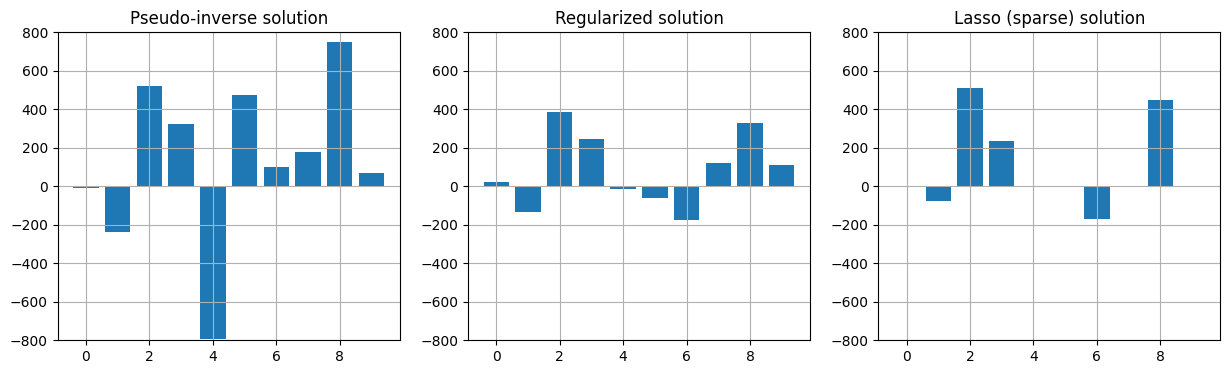

In [16]:
# Sparsity inducing (lasso) regularizer

from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)

wL = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ th_lasso

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[2].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[0].set_ylim(-800, 800)
ax[1].set_ylim(-800, 800)
ax[2].set_ylim(-800, 800)
ax[0].set_title("Pseudo-inverse solution")
ax[1].set_title("Regularized solution")
ax[2].set_title("Lasso (sparse) solution")
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
# ...
plt.savefig("solutions.png")

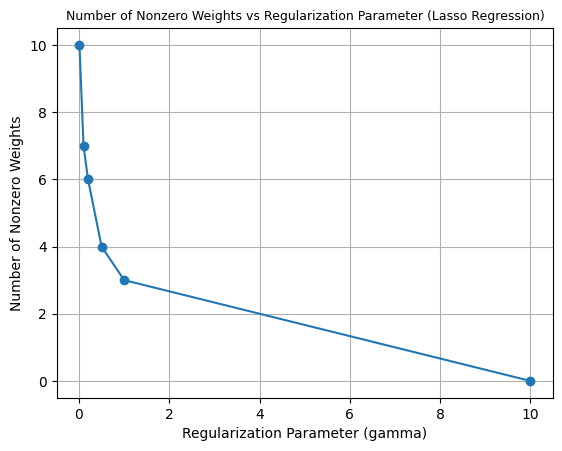

In [17]:
from sklearn.linear_model import Lasso

# Define a range of gamma values
gamma_values = [0.01, 0.1,0.2, 0.5, 1.0, 10.0]

# Initialize a list to store the number of nonzero weights for each gamma value
nonzero_weights_count = []

# Iterate over gamma values
for gamma in gamma_values:
    # Fit Lasso model
    lasso = Lasso(alpha=gamma)
    lasso.fit(X, t)
    
    # Count the number of nonzero weights
    nonzero_count = np.count_nonzero(lasso.coef_)
    
    # Append the count to the list
    nonzero_weights_count.append(nonzero_count)

# Plot the results
plt.plot(gamma_values, nonzero_weights_count, marker='o')
plt.xlabel('Regularization Parameter (gamma)')
plt.ylabel('Number of Nonzero Weights')
plt.title('Number of Nonzero Weights vs Regularization Parameter (Lasso Regression)',fontsize=9)
plt.grid(True)
plt.show()

Regularization Path

Text(0, 0.5, 'Regression Coefficients')

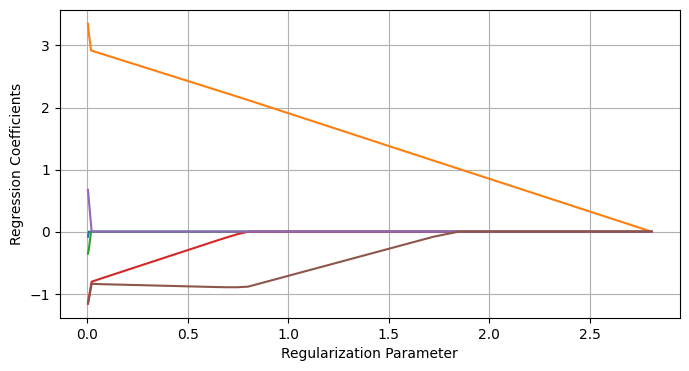

In [28]:
from sklearn.linear_model import lasso_path

N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization Parameter")
ax.set_ylabel("Regression Coefficients")

4. Solubility Prediction

Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


Load the data and split data into training and testing data sets

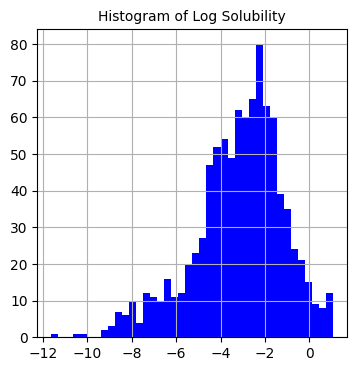

In [20]:
# Load the data
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx")
sol = sol.iloc[:, :-1]

colnames = sol.columns
f = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(f, bins=40, facecolor='blue')
ax.set_title("Histogram of Log Solubility", fontsize=10)
ax.grid(True)

Y = sol[colnames[5:len(colnames)]]
N, p = Y.shape

# Split data into training and test sets
Y_train, Y_test, f_train, f_test = train_test_split(Y, f, test_size=0.3)

(-12.0, 4.0)

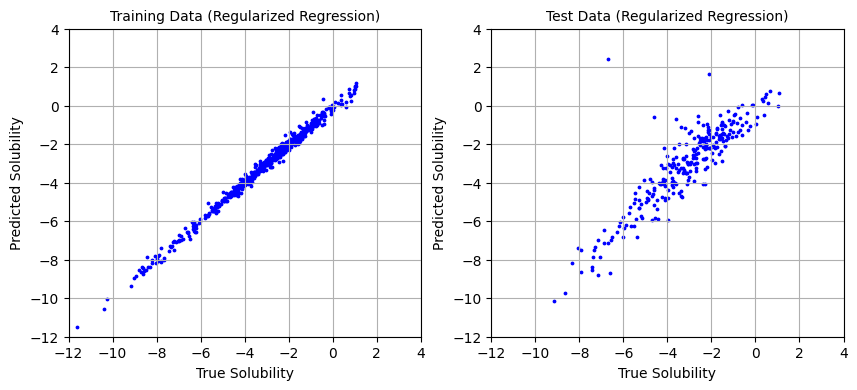

In [30]:
# Regularized regression
gamma = 2.3
sa = np.linalg.inv(Y_train.T @ Y_train + gamma * np.identity(p)) @ Y_train.T @ f_train
a = sa.to_numpy()
fh_train = Y_train @ a
fh_test = Y_test @ a

# Plot training and test predictions for regularized regression
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(f_train, fh_train, c='b', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data (Regularized Regression)", fontsize=10)
ax[0].set_xlabel("True Solubility")
ax[0].set_ylabel("Predicted Solubility")
ax[0].set_xlim(-12, 4)
ax[0].set_ylim(-12, 4)

ax[1].scatter(f_test, fh_test, c='b', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data (Regularized Regression)", fontsize=10)
ax[1].set_xlabel("True Solubility")
ax[1].set_ylabel("Predicted Solubility")
ax[1].set_xlim(-12, 4)
ax[1].set_ylim(-12, 4)

In [31]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model using Y_train and f_train
rf.fit(Y_train, f_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Get indices of top 10 features
top_10_indices = np.argsort(feature_importances)[-10:]

# Get names of top 10 features
top_10_features = Y.columns[top_10_indices]
print("Top 10 features:", top_10_features)

Top 10 features: Index(['P_VSA_v_3', 'SpPosA_B(i)', 'SM6_B(p)', 'MLOGP2', 'BLTA96', 'ALOGP2',
       'BLTF96', 'BLTD48', 'MLOGP', 'ALOGP'],
      dtype='object')


Text(0.5, 1.0, 'Test Data')

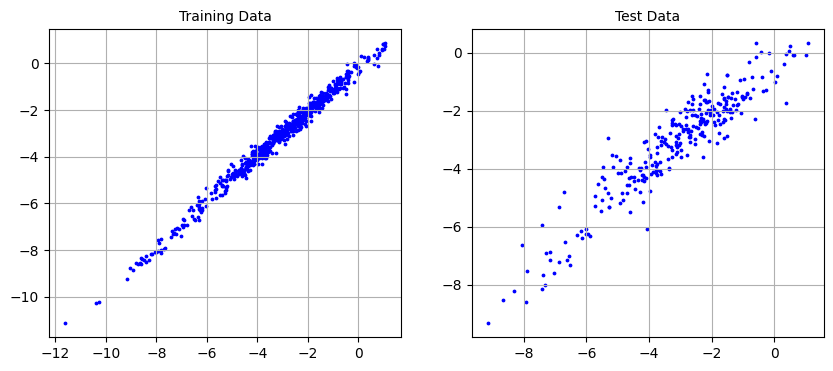

In [32]:
# Make predictions on test set using Random Forest
f_test_pred_rf = rf.predict(Y_test)

# Plot training and test predictions for Random Forest
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(f_train, rf.predict(Y_train), c='b', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=10)

ax[1].scatter(f_test, f_test_pred_rf, c='b', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=10)

In [35]:
# Cross-validation with Ridge regression using top 10 features
ridge_model = Ridge(alpha=1.0)
top_10_scores = cross_val_score(ridge_model, Y_train[top_10_features], f_train, cv=5)
print("Mean cross validation score with top 10 features:", np.mean(top_10_scores))

# Cross-validation with Ridge regression using all features
all_features_scores = cross_val_score(ridge_model, Y_train, f_train, cv=5)
print("Mean cross validation score with all features:", np.mean(all_features_scores))

Mean cross validation score with top 10 features: 0.8537056819712646
Mean cross validation score with all features: 0.6474530968679334


c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e+01, tolerance: 2.764e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.689e+01, tolerance: 2.764e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.937e+01, tolerance: 2.764e-01
  model = cd_fast.enet_

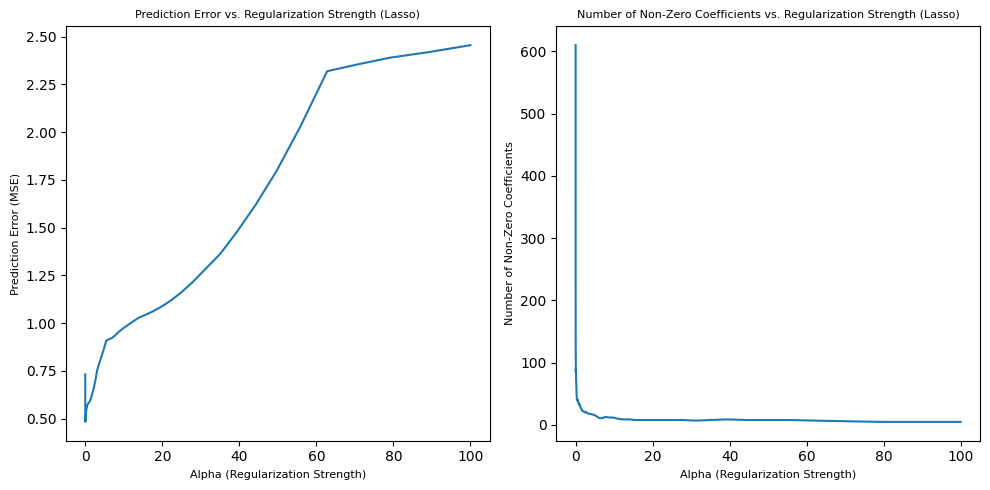

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx")
sol = sol.iloc[:, :-1]

colnames = sol.columns
f = sol["LogS.M."].values

Y = sol[colnames[5:len(colnames)]]
N, p = Y.shape

# Split data into training and test sets
Y_train, Y_test, f_train, f_test = train_test_split(Y, f, test_size=0.3)

# Initialize a range of alpha values for Lasso regularization
alphas = np.logspace(-3, 2, 100)

# Initialize lists to store results
prediction_errors = []
non_zero_coeffs_list = []

# Iterate over different alpha values and fit Lasso models
for alpha in alphas:
    # Initialize Lasso model with the current alpha
    lasso = Lasso(alpha=alpha)
    
    # Fit the Lasso model to the training data
    lasso.fit(Y_train, f_train)
    
    # Make predictions on the test set
    y_pred = lasso.predict(Y_test)
    
    # Calculate the prediction error (MSE) and store it
    mse = np.mean((f_test - y_pred) ** 2)
    prediction_errors.append(mse)
    
    # Count the number of non-zero coefficients and store it
    non_zero_coeffs = np.sum(lasso.coef_ != 0)
    non_zero_coeffs_list.append(non_zero_coeffs)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot prediction error vs. alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, prediction_errors)
plt.xlabel('Alpha (Regularization Strength)',fontsize=8)
plt.ylabel('Prediction Error (MSE)',fontsize=8)
plt.title('Prediction Error vs. Regularization Strength (Lasso)',fontsize=8)

# Plot number of non-zero coefficients vs. alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, non_zero_coeffs_list)
plt.xlabel('Alpha (Regularization Strength)', fontsize=8)
plt.ylabel('Number of Non-Zero Coefficients',fontsize=8)
plt.title('Number of Non-Zero Coefficients vs. Regularization Strength (Lasso)', fontsize = 8)

plt.tight_layout()
plt.show()
